In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor, LinearRegression, ElasticNet
from sklearn.svm import SVR
from explainerdashboard import RegressionExplainer, ClassifierExplainer, ExplainerDashboard, InlineExplainer
import matplotlib.pyplot as plt

RANDOM_STATE = 123

In [2]:
smt_2020_df = pd.read_excel('data/I11_SMT Incidents 2020.xlsx')

smt_2020_df.columns = smt_2020_df.iloc[11].values
smt_2020_df = smt_2020_df.iloc[12:]
smt_2020_df = smt_2020_df.reset_index(drop=True)


c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default


In [3]:
smt_2021_df = pd.read_excel('data/I11_SMT Incidents 2021.xlsx')

smt_2021_df.columns = smt_2021_df.iloc[11].values
smt_2021_df = smt_2021_df.iloc[12:]
smt_2021_df = smt_2021_df.reset_index(drop=True)

In [4]:
smt_2022_df = pd.read_excel('data/I11_SMT Incidents 2022.xlsx')

smt_2022_df.columns = smt_2022_df.iloc[11].values
smt_2022_df = smt_2022_df.iloc[12:]
smt_2022_df = smt_2022_df.reset_index(drop=True)

In [5]:
smt_df = pd.concat([smt_2020_df, smt_2021_df, smt_2022_df])
smt_df.reset_index(drop=True,inplace=True)

pd.set_option('display.max_columns', None)

smt_df

,Incident ID,Original Incident Number,Requisition ID,Created Date (UTC+0),Open Incident Type,Current Incident Type,Status,Status Reason,Company,Customer Department,Region,Site Group,Site,Desk Location,Reported Source,Summary,Impact,Open Priority,Current Priority,Assigned Group,Assigned Group Department,In Progess Time (hhh:mi)\n,Actual Duration/Open Time (hhh:mi),Down Time of CI-Unavailability (hhh:mi),Last Modified Date (UTC+0),First Resolved Date (UTC+0),Last Resolved Date (UTC+0),Created Month,Operational Categorization Tier 1,Operational Categorization Tier 2,Operational Categorization Tier 3,Service+,CI+,Product Categorization Tier 1,Product Categorization Tier 2,Product Categorization Tier 3,Product Name,Resolution Categorization Tier 1,Resolution Categorization Tier 2,Resolution Categorization Tier 3,Resolution Product Categorization Tier 1,Resolution Product Categorization Tier 2,Resolution Product Categorization Tier 3,Resolution Product Name,Primary Center Code,Target Date,Notes,Resolution,Created by CI-Hotline
0,INC000017348507,NaN,NaN,02.01.2020 11:00,Not assigned,User Service Request,Closed,No Further Action Required,AE,RBEM/MSS4-Q,EMEA,ES,MD1,MD1 150P3,Phone,Ampliar fecha de validez de windows#,4-Minor/Localized,Medium,Medium,Iberia4 -Md-,CI/CER-IB,Not Defined,0260:05,Not Specified,31.03.2020 22:04,03.01.2020 07:21,13.01.2020 07:05,JAN 2020,Request,- None -,- None -,CI-CAT ADMINISTRATION |IBERIA4,NaN,Service,Infrastructure Service,Support Service,NaN,Request,User Rights,- None -,Service,Infrastructure Service,Support Service,NaN,965899,,I: Important: I: Do NOT use this service for r...,"Se habilita la cuenta NT, esta se desactivo ce...",Yes
1,INC000017354421,NaN,NaN,04.01.2020 17:52,Not assigned,User Service Request,Closed,No Further Action Required,AE,RBEM/MSS4-Q,EMEA,ES,MD1,Md1 150P3,Phone,Cuenta de NT caducada#,4-Minor/Localized,Low,Medium,Iberia4 -Md-,CI/CER-IB,Not Defined,0205:20,Not Specified,31.03.2020 22:04,05.01.2020 11:48,13.01.2020 07:12,JAN 2020,Request,Modify,- None -,NT USER MODIFY |IBERIA4,NaN,Service,Infrastructure Service,Support Service,NaN,Request,User Rights,- None -,Service,Infrastructure Service,Support Service,NaN,965859,,30.06.2020 Q: User ID (e.g. xyz8fe): A: GSS2M...,Se amplía de nuevo la fecha de validez del usu...,Yes
2,INC000017400389,NaN,NaN,13.01.2020 09:51,Not assigned,User Service Request,Closed,Customer Follow-Up Required,AE,RBEM/LOP1,EMEA,ES,MD1,Md1 155P3,Email,usuario caducado#,4-Minor/Localized,Low,Medium,Iberia4 -Md-,CI/CER-IB,0:4,0022:02,Not Specified,31.03.2020 22:04,13.01.2020 10:39,14.01.2020 07:53,JAN 2020,Request,- None -,- None -,CI-CAT ADMINISTRATION |IBERIA4,NaN,Service,Infrastructure Service,Support Service,NaN,Request,- None -,- None -,Service,Infrastructure Service,Support Service,NaN,965138,,Su solicitud vía e-mail ha sido transferida a ...,"Como ya dijimos al cerrar el ticket, la valide...",Yes
3,INC000017470045,NaN,10065659,23.01.2020 14:49,Not assigned,User Service Request,Closed,No Further Action Required,M,M/PQA1-RBEM,EMEA,ES,MD1,Md1 162P4,Walk In,My Mobile MSD Micro Pilot : Order Service#,4-Minor/Localized,Low,Low,Iberia4 -Md-,CI/CER-IB,170:8,0502:49,Not Specified,19.03.2020 22:00,13.02.2020 13:38,13.02.2020 13:38,JAN 2020,Request,- None -,- None -,MY MOBILE - LOCAL SUPPORT |IBERIA4,NaN,Service,End Device Service,Mobile Device Service,NaN,Request,- None -,- None -,Service,End Device Service,Mobile Device Service,NaN,NaN,,------------------------------------------ // ...,Móvil MD-Y1733 entregado y configurado,Yes
4,INC000017470799,NaN,10061208,23.01.2020 16:51,Not assigned,User Service Request,Closed,No Further Action Required,TT,TT/SSP-ASA,EMEA,ES,MD,Md,Other,My Mobile MSD Micro Pilot : Order Service#,4-Minor/Localized,Low,Low,Iberia4 -Md-,CI/CER-IB,360:45,0475:00,Not Specified,18.03.2020 22:00,12.02.2020 11:51,12.02.2020 11:51,JAN 2020,Request,- None -,- None -,MY MOBILE - LOCAL SUPPORT |IBERIA4,NaN,Service,End Device Service,Mobile Device Service,NaN,Requ

In [6]:
celonis_2020_df = pd.read_excel('data/Tickets_Celonis_2020.xlsx')
celonis_2020_df = celonis_2020_df.reset_index(drop=True)

In [7]:
celonis_2021_df = pd.read_excel('data/Tickets_Celonis_2021.xlsx')
celonis_2021_df = celonis_2021_df.reset_index(drop=True)

In [8]:
celonis_2022_df = pd.read_excel('data/Tickets_Celonis_2022.xlsx')
celonis_2022_df = celonis_2022_df.reset_index(drop=True)

In [9]:
celonis_df = pd.concat([celonis_2020_df, celonis_2021_df, celonis_2022_df])
celonis_df.reset_index(drop=True,inplace=True)

celonis_df

,Incident Number,Submit Date,Service Name,Site Group,Site,Incident Type,Ticket Summary,Submitter Group,Last Assigned Organization,Last Assigned Group,Entry Channel,Last Resolution Date,Template Name,User Company,Resolver Organization,Requisition ID,Reported Source,Last Resolution Time,CI,Status,Priority
0,INC000017346024,2020-01-02 05:46:38,CI-CAT ADMINISTRATION |IBERIA4,ES,Md1,User Service Request,Usuarios expirados,ITSD - IT Service Desk,Regional Services World,Iberia4 -Md-,CI-Hotline / ITSD,2020-01-02 10:36:24,NaN,AE,IT Personal Support,NaN,Phone,4.956944,NaN,Closed,Medium
1,INC000017346091,2020-01-02 06:42:34,CI-CAT ADMINISTRATION |IBERIA4,ES,Md,User Service Request,Password NT - Reset_ES,ITSD - IT Service Desk,Regional Services World,Iberia4 -Md-,CI-Hotline / ITSD,2020-01-02 07:11:50,Password NT - Reset_ES,RBIB,IT Personal Support,NaN,Phone,0.514444,NaN,Closed,Medium
2,INC000017346702,2020-01-02 06:57:03,CI-CAT ADMINISTRATION |IBERIA4,ES,Md1,User Service Request,Ampliación de validez de cuenta,ITSD - IT Service Desk,Regional Services World,Iberia4 -Md-,CI-Hotline / ITSD,2020-01-02 07:08:31,NaN,AE,IT Personal Support,NaN,Phone,0.260278,NaN,Closed,Medium
3,INC000017346738,2020-01-02 07:31:46,CI-CAT ADMINISTRATION |IBERIA4,ES,Md1,User Service Request,Cuenta windows expirada,ITSD - IT Service Desk,Regional Services World,Iberia4 -Md-,CI-Hotline / ITSD,2020-01-03 11:00:32,NaN,AE,IT Personal Support,NaN,Phone,27.522500,NaN,Closed,Low
4,INC000017346753,2020-01-02 07:55:23,CI-CAT ADMINISTRATION |IBERIA4,ES,Md,User Service Request,Password NT - Reset_ES,ITSD - IT Service Desk,Regional Services World,Iberia4 -Md-,CI-Hotline / ITSD,2020-01-02 08:46:09,Password NT - Reset_ES,AA,IT Personal Support,NaN,Phone,0.860000,NaN,Closed,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14733,INC000023672067,2022-12-27 15:59:26,CI-CAT ADMINISTRATION |SPAIN1,ES,Aj,User Service Request,Mailbox - ITSP Request 19405191,ITSD - IT Service Desk,Regional Services EMEA,Spain1,IT Service Portal,2023-01-03 12:12:35,NaN,PS,IT Personal Support,19405191.0,Self Service,164.219167,NaN,Closed,Low
14734,INC000023672229,2022-12-27 15:06:34,SOFTWARE NO SCCM |SPAIN1,ES,Md,User Service Restoration,wmedtra not working,ITSD - ES,Regional Services EMEA,Spain1,CI-Hotline / ITSD,2022-12-28 14:58:20,NaN,C,IT Personal Support,NaN,Phone,23.933889,SOFTWARE NO SCCM |SPAIN1,Closed,Low
14735,INC000023674299,2022-12-28 12:26:54,TELEPHONY LOCAL SUPPORT |SPAIN1,ES,Md,User Service Restoration,Mobile phone,ITSD - IT Service Desk,Regional Services EMEA,Spain1,CI-Hotline / ITSD,2022-12-28 12:57:20,NaN,GS,IT Personal Support,NaN,Phone,0.578333,TELEPHONY LOCAL SUPPORT |SPAIN1,Closed,Low
14736,INC000023674336,2022-12-28 09:18:41,"NT PASSWORD RESET |EMEA, LA",ES,Md1,User Service Request,Reset password,Spain1,Regional Services EMEA,Spain1,IT Personal Support,2022-12-28 09:18:41,CD/CW_only_ITS_Request,AE,IT Personal Support,NaN,Walk In,0.020556,"NT PASSWORD RESET |EMEA, LA",Closed,Low


In [10]:
smt_df['Original Incident Number'].isna().all()

smt_df['Original Incident Number'].notna().sum()

2

In [11]:
output = celonis_df.isnull().sum()
output.to_csv('data/missing_values_output.csv')
output

Incident Number                   0
Submit Date                       0
Service Name                      0
Site Group                        0
Site                              0
Incident Type                     0
Ticket Summary                    0
Submitter Group                  16
Last Assigned Organization        0
Last Assigned Group               0
Entry Channel                     0
Last Resolution Date              0
Template Name                  8842
User Company                      0
Resolver Organization             0
Requisition ID                10576
Reported Source                  88
Last Resolution Time              0
CI                             8174
Status                            0
Priority                          0
dtype: int64

In [10]:
#Posibles a borrar ['Current Incident Type', 'Region', 'Impact', 'Site','Product Categorization Tier 1', 'Resolution Categorization Tier 1', 'Resolution Categorization Tier 2', ]
#Posibles a no borrar ['Customer Department', 'Primary Center Code']

smt_df_clean = smt_df.drop(['Original Incident Number', 'Requisition ID', 'Created Date (UTC+0)', 'Status', 'Status Reason', 'Customer Department', 'Summary', 'Desk Location', 'Impact', 'In Progess Time (hhh:mi)\n', 'Actual Duration/Open Time (hhh:mi)',
                                         'Down Time of CI-Unavailability (hhh:mi)', 'Last Modified Date (UTC+0)', 'First Resolved Date (UTC+0)', 'Last Resolved Date (UTC+0)', 'Created Month', 'Service+', 'CI+', 'Product Name', 
                                         'Resolution Categorization Tier 3', 'Resolution Product Name', 'Primary Center Code', 'Target Date', 'Notes', 'Resolution', 'Open Priority', 'Current Priority', 'Region'], axis=1)
smt_df_clean.dropna(inplace=True)
smt_df_clean

,Incident ID,Open Incident Type,Current Incident Type,Company,Site Group,Site,Reported Source,Assigned Group,Assigned Group Department,Operational Categorization Tier 1,Operational Categorization Tier 2,Operational Categorization Tier 3,Product Categorization Tier 1,Product Categorization Tier 2,Product Categorization Tier 3,Resolution Categorization Tier 1,Resolution Categorization Tier 2,Resolution Product Categorization Tier 1,Resolution Product Categorization Tier 2,Resolution Product Categorization Tier 3,Created by CI-Hotline
0,INC000017348507,Not assigned,User Service Request,AE,ES,MD1,Phone,Iberia4 -Md-,CI/CER-IB,Request,- None -,- None -,Service,Infrastructure Service,Support Service,Request,User Rights,Service,Infrastructure Service,Support Service,Yes
1,INC000017354421,Not assigned,User Service Request,AE,ES,MD1,Phone,Iberia4 -Md-,CI/CER-IB,Request,Modify,- None -,Service,Infrastructure Service,Support Service,Request,User Rights,Service,Infrastructure Service,Support Service,Yes
2,INC000017400389,Not assigned,User Service Request,AE,ES,MD1,Email,Iberia4 -Md-,CI/CER-IB,Request,- None -,- None -,Service,Infrastructure Service,Support Service,Request,- None -,Service,Infrastructure Service,Support Service,Yes
3,INC000017470045,Not assigned,User Service Request,M,ES,MD1,Walk In,Iberia4 -Md-,CI/CER-IB,Request,- None -,- None -,Service,End Device Service,Mobile Device Service,Request,- None -,Service,End Device Service,Mobile Device Service,Yes
4,INC000017470799,Not assigned,User Service Request,TT,ES,MD,Other,Iberia4 -Md-,CI/CER-IB,Request,- None -,- None -,Service,End Device Service,Mobile Device Service,Request,- None -,Service,End Device Service,Mobile Device Service,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11944,INC000023672229,User Service Restoration,User Service Restoration,C,ES,MD,Phone,Spain1,BD/PFE-IA,Failure,Application,- None -,Service,Application Service,Application Service,Handling,Unclear,Service,Application Service,Application Service,Yes
11945,INC000023674299,User Service Restoration,User Service Restoration,GS,ES,MD,Phone,Spain1,BD/PFE-IA,Failure,- None -,- None -,Service,IT Service,IT Service,Handling,Unclear,Service,IT Service,IT Service,Yes
11946,INC000023674336,User Service Request,User Service Request,AE,ES,MD1,Walk In,Spain1,BD/PFE-IA,Request,- None -,- None -,Service,IT Service,IT Service,Request,- None -,Service,IT Service,IT Service,No
11947,INC000023678629,User Service Request,User Service Request,AE,ES,MD1,Phone,Spain1,BD/PFE-IA,Request,- None -,- None -,Service,Infrastructure Service,Support Service,Request,User Rights,Service,Infrastructure Service,Support Service,Yes


In [11]:
#Posibles a borrar ['Site Group', 'Submitter Group', 'Resolver Organization']
#Posibles a no borrar ['Template Name', 'User Company']

celonis_df_clean = celonis_df.drop(['Submit Date', 'Service Name', 'Ticket Summary', 'Last Resolution Date', 'Template Name', 'User Company', 'Requisition ID', 'CI', 'Site', 'Site Group', 'Reported Source', 'Status', 'Resolver Organization'], axis=1)
celonis_df_clean.dropna(inplace=True)
celonis_df_clean

,Incident Number,Incident Type,Submitter Group,Last Assigned Organization,Last Assigned Group,Entry Channel,Last Resolution Time,Priority
0,INC000017346024,User Service Request,ITSD - IT Service Desk,Regional Services World,Iberia4 -Md-,CI-Hotline / ITSD,4.956944,Medium
1,INC000017346091,User Service Request,ITSD - IT Service Desk,Regional Services World,Iberia4 -Md-,CI-Hotline / ITSD,0.514444,Medium
2,INC000017346702,User Service Request,ITSD - IT Service Desk,Regional Services World,Iberia4 -Md-,CI-Hotline / ITSD,0.260278,Medium
3,INC000017346738,User Service Request,ITSD - IT Service Desk,Regional Services World,Iberia4 -Md-,CI-Hotline / ITSD,27.522500,Low
4,INC000017346753,User Service Request,ITSD - IT Service Desk,Regional Services World,Iberia4 -Md-,CI-Hotline / ITSD,0.860000,Medium
...,...,...,...,...,...,...,...,...
14733,INC000023672067,User Service Request,ITSD - IT Service Desk,Regional Services EMEA,Spain1,IT Service Portal,164.219167,Low
14734,INC000023672229,User Service Restoration,ITSD - ES,Regional Services EMEA,Spain1,CI-Hotline / ITSD,23.933889,Low
14735,INC000023674299,User Service Restoration,ITSD - IT Service Desk,Regional Services EMEA,Spain1,CI-Hotline / ITSD,0.578333,Low
14736,INC000023674336,User Service Request,Spain1,Regional Services EMEA,Spain1,IT Personal Support,0.020556,Low


In [12]:
combined_df = pd.merge(celonis_df_clean, smt_df_clean, how='inner', left_on='Incident Number', right_on='Incident ID')
combined_df.drop(['Incident ID'], axis=1, inplace=True) #Comprobar Target Date
combined_df.shape

(11750, 28)

In [15]:
Q1 = combined_df['Last Resolution Time'].quantile(0.1)
Q3 = combined_df['Last Resolution Time'].quantile(0.9)
IQR = Q3 - Q1

# Filtra las filas que no son outliers
combined_df = combined_df[(combined_df['Last Resolution Time'] >= Q1 - 1.5 * IQR) & (combined_df['Last Resolution Time'] <= Q3 + 1.5 * IQR)]
combined_df.shape

(11324, 28)

In [16]:
combined_df.nlargest(200, 'Last Resolution Time')

,Incident Number,Incident Type,Submitter Group,Last Assigned Organization,Last Assigned Group,Entry Channel,Last Resolution Time,Priority,Open Incident Type,Current Incident Type,Company,Site Group,Site,Reported Source,Assigned Group,Assigned Group Department,Operational Categorization Tier 1,Operational Categorization Tier 2,Operational Categorization Tier 3,Product Categorization Tier 1,Product Categorization Tier 2,Product Categorization Tier 3,Resolution Categorization Tier 1,Resolution Categorization Tier 2,Resolution Product Categorization Tier 1,Resolution Product Categorization Tier 2,Resolution Product Categorization Tier 3,Created by CI-Hotline
10659,INC000023117388,User Service Request,Latin America – Region 1,Regional Services EMEA,Spain1 - EXT,IT Personal Support,229.778056,Low,User Service Restoration,User Service Request,C,ES,MD,Direct Input,Spain1 - EXT,BD/PFE-IA,Request,- None -,- None -,Service,End Device Service,Personal Computer,Request,- None -,Service,End Device Service,Personal Computer,No
5511,INC000020906356,User Service Request,ITSD - ES,Regional Services EMEA,Spain1,CI-Hotline / ITSD,222.544722,Low,Not assigned,User Service Request,ATMO,ES,MD1,Email,Spain1,BD/PFE-IA,Request,- None -,- None -,Service,End Device Service,Mobile Device Service,Request,Documentation,Service,End Device Service,Mobile Device Service,Yes
7256,INC000021621719,User Service Request,ITSD - IT Service Desk,Regional Services EMEA,Spain1 - EXT,IT Service Portal,220.052500,Low,User Service Request,User Service Request,AE,ES,MD1,Self Service,Spain1 - EXT,BD/PFE-IA,Request,- None -,- None -,Service,Business Service,Business Service,Request,Hardware,Service,Business Service,Business Service,Yes
2756,INC000019443505,User Service Request,ITSD - IT Service Desk,Regional Services Central Europe,Iberia4,IT Service Portal,219.638333,Low,Not assigned,User Service Request,AE,ES,MD1,Other,Iberia4,CI/CER-IB,Request,- None -,- None -,Service,End Device Service,Mobile Device Service,Request,Hardware,Service,End Device Service,Mobile Device Service,Yes
9839,INC000022798904,User Service Request,ITSD - ES,Regional Services EMEA,Spain1 - EXT,CI-Hotline / ITSD,219.007222,Low,User Service Request,User Service Request,PS,ES,AJ,Chat,Spain1 - EXT,BD/PFE-IA,Request,- None -,- None -,Service,Infrastructure Service,Network Service,Infrastructure,- None -,Service,Infrastructure Service,Network Service,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,INC000018168615,User Service Request,ITSD - IT Service Desk,Regional Services Central Europe,Iberia4,CI-Hotline / ITSD,166.678333,Low,Not assigned,User Service Request,GS,ES,MD,Email,Iberia4,CI/CER-IB,Request,- None -,- None -,Service,End Device Service,Print Service,Request,- None -,Service,End Device Service,Print Service,Yes
9483,INC000022594623,User Service Request,ITSD - IT Service Desk,Regional Services EMEA,Spain1 - EXT,IT Service Portal,166.667222,Low,User Service Request,User Service Request,GS,ES,MD,Self Service,Spain1 - EXT,BD/PFE-IA,Request,- None -,- None -,Service,Business Service,Business Service,Request,- None -,Service,Business Service,Business Service,Yes
1386,INC000018428250,User Service Request,ITSD - IT Service Desk,Regional Services Central Europe,Iberia4,CI-Hotline / ITSD,166.616667,Low,Not assigned,User Service Request,GS,ES,MD,Email,Iberia4,CI/CER-IB,Request,- None -,- None -,Service,Infrastructure Service,Security Service,Request,- None -,Service,Infrastructure Service,Security Service,Yes
8267,INC000022088854,User Service Request,ITSD - IT Service Desk,Regional Services EMEA,Spain1,IT Service Portal,166.583611,Low,User Service Request,User Service Request,AA,ES,MD,Self Service,Spain1,BD/PFE-IA,Request,- None -,- None -,Service,End Device Service,Mobile Device Service,Request,Hardware,Service,End Device Service,Mobile Device Service,Yes


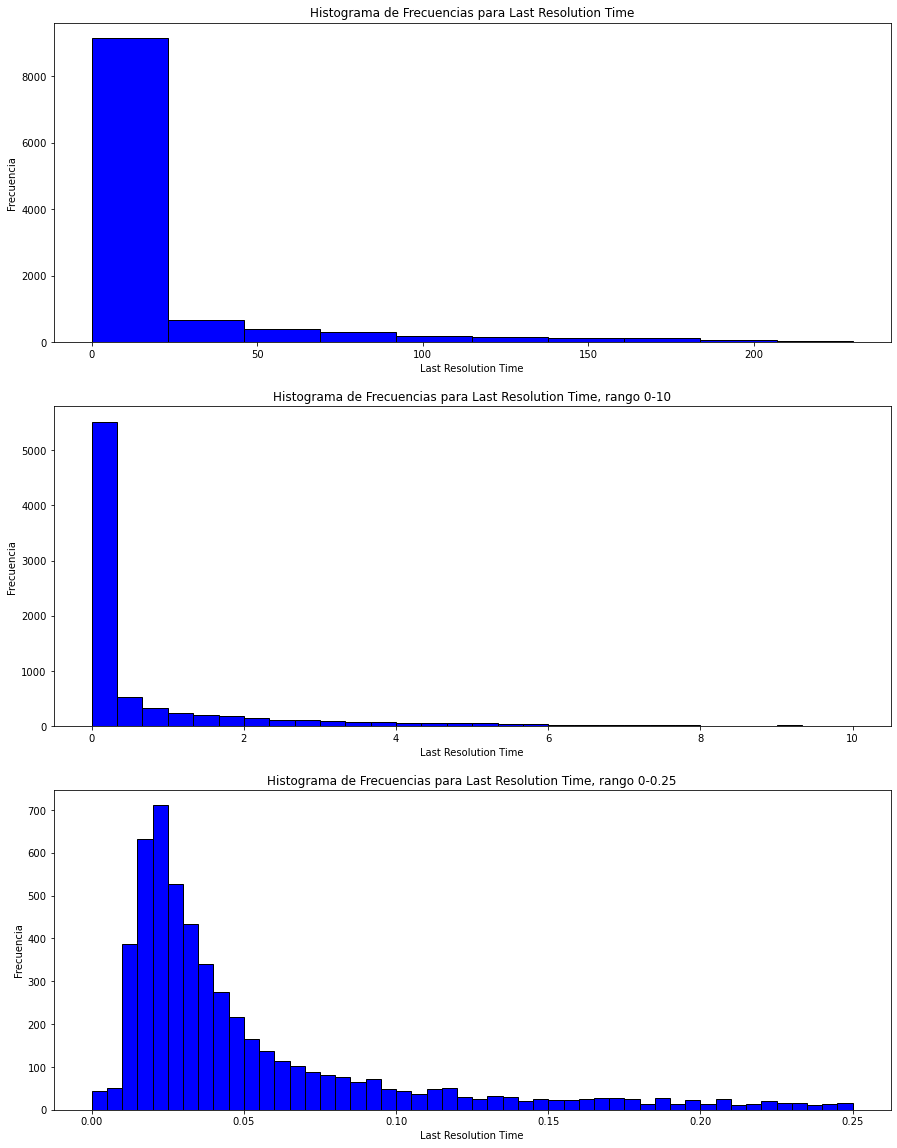

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

axs[0].hist(combined_df['Last Resolution Time'], bins=10, color='blue', edgecolor='black')
axs[0].set_xlabel('Last Resolution Time')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Histograma de Frecuencias para Last Resolution Time')

axs[1].hist(combined_df['Last Resolution Time'], bins=30, range = (0, 10), color='blue', edgecolor='black')
axs[1].set_xlabel('Last Resolution Time')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Histograma de Frecuencias para Last Resolution Time, rango 0-10')

axs[2].hist(combined_df['Last Resolution Time'], bins=50, range = (0, 0.25), color='blue', edgecolor='black')
axs[2].set_xlabel('Last Resolution Time')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('Histograma de Frecuencias para Last Resolution Time, rango 0-0.25')

# Muestra el histograma
plt.show()

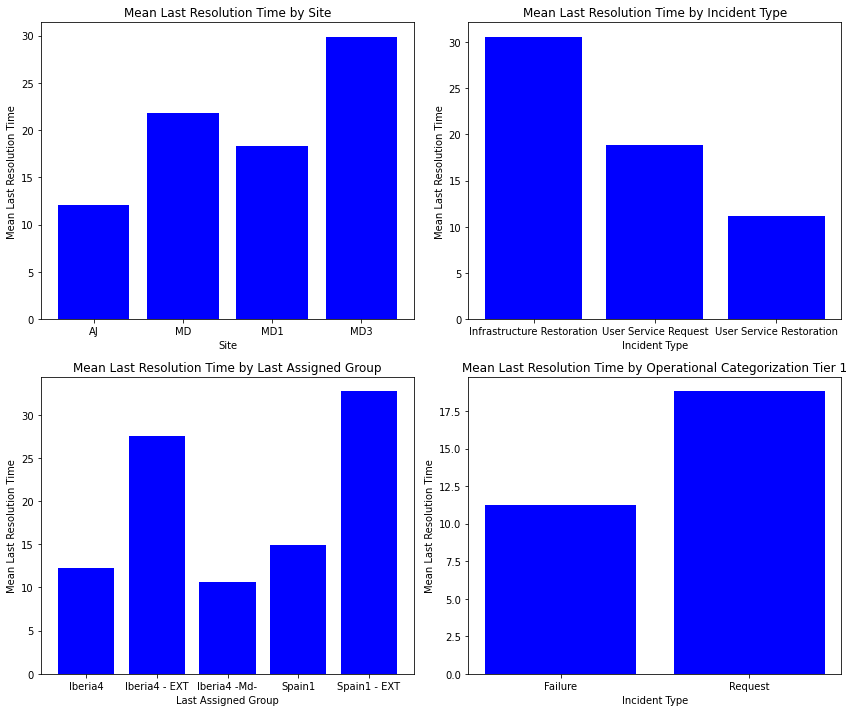

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Segun Site
grouped_df = combined_df.groupby('Site')['Last Resolution Time'].mean().reset_index()
ax[0][0].bar(grouped_df['Site'], grouped_df['Last Resolution Time'], color='blue')
ax[0][0].set_xlabel('Site')
ax[0][0].set_ylabel('Mean Last Resolution Time')
ax[0][0].set_title('Mean Last Resolution Time by Site')
ax[0][0].set_xticks(grouped_df['Site'])

# Segun Incident Type
grouped_df = combined_df.groupby('Incident Type')['Last Resolution Time'].mean().reset_index()
ax[0][1].bar(grouped_df['Incident Type'], grouped_df['Last Resolution Time'], color='blue')
ax[0][1].set_xlabel('Incident Type')
ax[0][1].set_ylabel('Mean Last Resolution Time')
ax[0][1].set_title('Mean Last Resolution Time by Incident Type')
ax[0][1].set_xticks(grouped_df['Incident Type'])

# Segun Last Assigned Group
grouped_df = combined_df.groupby('Last Assigned Group')['Last Resolution Time'].mean().reset_index()
ax[1][0].bar(grouped_df['Last Assigned Group'], grouped_df['Last Resolution Time'], color='blue')
ax[1][0].set_xlabel('Last Assigned Group')
ax[1][0].set_ylabel('Mean Last Resolution Time')
ax[1][0].set_title('Mean Last Resolution Time by Last Assigned Group')
ax[1][0].set_xticks(grouped_df['Last Assigned Group'])

# Segun Operational Categorization Tier 1
grouped_df = combined_df.groupby('Operational Categorization Tier 1')['Last Resolution Time'].mean().reset_index()
ax[1][1].bar(grouped_df['Operational Categorization Tier 1'], grouped_df['Last Resolution Time'], color='blue')
ax[1][1].set_xlabel('Incident Type')
ax[1][1].set_ylabel('Mean Last Resolution Time')
ax[1][1].set_title('Mean Last Resolution Time by Operational Categorization Tier 1')
ax[1][1].set_xticks(grouped_df['Operational Categorization Tier 1'])


# Muestra la gráfica
plt.tight_layout()
plt.show()

In [19]:
combined_drop_df = combined_df[combined_df['Entry Channel'] != 'IT Personal Support']

In [20]:
columns_list = combined_drop_df.columns
columns_list = [elem for elem in columns_list if elem not in ['Incident Number', 'Last Resolution Time']] 
combined_df_one_hot = pd.get_dummies(combined_drop_df, columns=columns_list)
combined_df_one_hot

,Incident Number,Last Resolution Time,Incident Type_Infrastructure Restoration,Incident Type_User Service Request,Incident Type_User Service Restoration,Submitter Group_AA-ICO-ITP-KA CSG,Submitter Group_Client Base Technology,Submitter Group_HiP-IT CSG,Submitter Group_Human Resources - HR Core ES CSG,Submitter Group_IT Infrastructure Automation,Submitter Group_ITSD - DE,Submitter Group_ITSD - EN,Submitter Group_ITSD - ES,Submitter Group_ITSD - FR,Submitter Group_ITSD - IT Service Desk,Submitter Group_ITSD - Security Incident,Submitter Group_Network LAN EMEA wo DACH,Last Assigned Organization_Regional Services Central Europe,Last Assigned Organization_Regional Services EMEA,Last Assigned Organization_Regional Services World,Last Assigned Group_Iberia4,Last Assigned Group_Iberia4 - EXT,Last Assigned Group_Iberia4 -Md-,Last Assigned Group_Spain1,Last Assigned Group_Spain1 - EXT,Entry Channel_CI-Hotline / ITSD,Entry Channel_IT Service Portal,Entry Channel_IT Support Page,Entry Channel_Other,Priority_High,Priority_Low,Priority_Medium,Open Incident Type_Not assigned,Open Incident Type_User Service Request,Open Incident Type_User Service Restoration,Current Incident Type_Infrastructure Restoration,Current Incident Type_User Service Request,Current Incident Type_User Service Restoration,Company_AA,Company_AE,Company_ATMO,Company_BCI,Company_BT,Company_C,Company_CI,Company_CP,Company_CS,Company_DA,Company_EU2,Company_EXTERN-UNKNOWN,Company_GR,Company_GS,Company_IOX,Company_M,Company_PA,Company_PC,Company_PS,Company_PT,Company_RBIB,Company_RBIT,Company_RBNA,Company_RN,Company_ST,Company_SX,Company_TT,Company_VW,Company_XC,Site Group_ES,Site_AJ,Site_MD,Site_MD1,Site_MD3,Reported Source_Chat,Reported Source_Direct Input,Reported Source_Email,Reported Source_Not Defined,Reported Source_Other,Reported Source_Phone,Reported Source_Self Service,Reported Source_Walk In,Reported Source_Web,Assigned Group_Iberia4,Assigned Group_Iberia4 - EXT,Assigned Group_Iberia4 -Md-,Assigned Group_Spain1,Assigned Group_Spain1 - EXT,Assigned Group Department_BD/PFE-IA,Assigned Group Department_CI/CER-IB,Operational Categorization Tier 1_Failure,Operational Categorization Tier 1_Request,Operational Categorization Tier 2_- None -,Operational Categorization Tier 2_Add,Operational Categorization Tier 2_Application,Operational Categorization Tier 2_Consult,Operational Categorization Tier 2_Delete,Operational Categorization Tier 2_Install,Operational Categorization Tier 2_Installation,Operational Categorization Tier 2_Modify,Operational Categorization Tier 2_Patch,Operational Categorization Tier 2_Repair,Operational Categorization Tier 2_Reset,Operational Categorization Tier 2_Unlock,Operational Categorization Tier 3_- None -,Operational Categorization Tier 3_Password,Operational Categorization Tier 3_Rights,Operational Categorization Tier 3_Role,Operational Categorization Tier 3_Space,Operational Categorization Tier 3_User,Product Categorization Tier 1_Process,Product Categorization Tier 1_Service,Product Categorization Tier 2_Application Service,Product Categorization Tier 2_Business Service,Product Categorization Tier 2_Commercial Process,Product Categorization Tier 2_Commercial Service,Product Categorization Tier 2_End Device Service,Product Categorization Tier 2_IT Service,Product Categorization Tier 2_Infrastructure Service,Product Categorization Tier 3_Application Service,Product Categorization Tier 3_Business Process,Product Categorization Tier 3_Business Service,Product Categorization Tier 3_Communication Service,Product Categorization Tier 3_Directory Service,Product Categorization Tier 3_Enterprise Application Service,Product Categorization Tier 3_File Service,Product Categorization Tier 3_IT Service,Product Categorization Tier 3_Infrastructure IT Service,Product Categorization Tier 3_Local Software Service,Product Categorization Tier 3_Mobile Device Service,Product Categorization Tier 3_Network Service,Product Categorization Tier 3_Output Management Serv

In [21]:
X = combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).values
y = combined_df_one_hot['Last Resolution Time'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [22]:
gbr = GradientBoostingRegressor(random_state=RANDOM_STATE, n_estimators=600, max_depth=4, learning_rate=0.01, loss='squared_error')

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=600,
                          random_state=123)

In [23]:
gbr_predictions = gbr.predict(X_test)

mse = mean_squared_error(y_test, gbr_predictions)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

gbr_predictions

The mean squared error (MSE) on test set: 1683.1901


array([18.18047606, 15.84042634, 72.02682168, ..., 59.93946776,
       25.83568428, 15.84042634])

In [24]:
y_test

array([ 7.45027778,  2.11694444, 50.73555556, ...,  1.13694444,
       72.73222222,  0.41388889])

In [25]:
X_test_df = pd.DataFrame(X_test, columns=combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).columns)
y_test_df = pd.DataFrame(y_test, columns=['Last Resolution Time'])

y_test_df

,Last Resolution Time
0,7.450278
1,2.116944
2,50.735556
3,214.873611
4,2.431389
...,...
1224,2.132500
1225,151.148333
1226,1.136944
1227,72.732222


In [26]:
df_predictions = pd.DataFrame({'Predicciones': gbr_predictions})

df_predictions

,Predicciones
0,18.180476
1,15.840426
2,72.026822
3,76.192848
4,24.865424
...,...
1224,14.279310
1225,76.192848
1226,59.939468
1227,25.835684


In [27]:
explainer = RegressionExplainer(gbr, X_test_df, y_test_df)

ExplainerDashboard(explainer).run(port=8054)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.40:8054


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8054): Max retries exceeded with url: /_alive_823757f7-71d5-431c-9e3e-80413a72f59c (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DDFE3521C0>: Failed to establish a new connection: [WinError 10049] La dirección solicitada no es válida en este contexto'))

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

sgd = SGDRegressor(random_state=RANDOM_STATE)

sgd.fit(X_train, y_train)

sgd_predictions = sgd.predict(X_test)

mse = mean_squared_error(y_test, sgd_predictions)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

sgd_predictions

The mean squared error (MSE) on test set: 1811.7884


array([21.41790753, 28.70516012, 83.81212089, ..., 59.39855125,
       29.17965301, 28.70516012])

In [29]:
"""len(combined_df_one_hot.index) * 0.2"""

'len(combined_df_one_hot.index) * 0.2'

In [30]:
X_test_df = pd.DataFrame(X_test, columns=combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).columns)
y_test_df = pd.DataFrame(y_test, columns=['Last Resolution Time'])

y_test_df

,Last Resolution Time
0,7.450278
1,2.116944
2,50.735556
3,214.873611
4,2.431389
...,...
1224,2.132500
1225,151.148333
1226,1.136944
1227,72.732222


In [31]:
#explainer = RegressionExplainer(sgd, X_test_df, y_test_df)

#ExplainerDashboard(explainer).run(port=8052)

In [32]:
combined_df = combined_df.drop('Entry Channel', axis=1)

In [33]:
columns_list = combined_df.columns
columns_list = [elem for elem in columns_list if elem not in ['Incident Number', 'Last Resolution Time']] 
combined_df_one_hot = pd.get_dummies(combined_df, columns=columns_list)
combined_df_one_hot

,Incident Number,Last Resolution Time,Incident Type_Infrastructure Restoration,Incident Type_User Service Request,Incident Type_User Service Restoration,Submitter Group_AA-ICO-ITP-KA CSG,Submitter Group_Client Base Technology,Submitter Group_Field Services Regional Latin America BR3,Submitter Group_HiP-IT CSG,Submitter Group_Human Resources - HR Core ES CSG,Submitter Group_IT Infrastructure Automation,Submitter Group_ITSD - DE,Submitter Group_ITSD - EN,Submitter Group_ITSD - ES,Submitter Group_ITSD - FR,Submitter Group_ITSD - IT Service Desk,Submitter Group_ITSD - Security Incident,Submitter Group_Iberia1,Submitter Group_Iberia4,Submitter Group_Iberia4 - EXT,Submitter Group_Iberia4 -Md-,Submitter Group_Iberia4 -Md- - EXT,Submitter Group_Latin America - Region 2,Submitter Group_Latin America – Region 1,Submitter Group_Network LAN EMEA wo DACH,Submitter Group_Spain1,Submitter Group_Spain1 - EXT,Last Assigned Organization_Regional Services Central Europe,Last Assigned Organization_Regional Services EMEA,Last Assigned Organization_Regional Services World,Last Assigned Group_Iberia4,Last Assigned Group_Iberia4 - EXT,Last Assigned Group_Iberia4 -Md-,Last Assigned Group_Spain1,Last Assigned Group_Spain1 - EXT,Priority_High,Priority_Low,Priority_Medium,Open Incident Type_Infrastructure Restoration,Open Incident Type_Not assigned,Open Incident Type_User Service Request,Open Incident Type_User Service Restoration,Current Incident Type_Infrastructure Restoration,Current Incident Type_User Service Request,Current Incident Type_User Service Restoration,Company_AA,Company_AE,Company_ATMO,Company_BCI,Company_BT,Company_C,Company_CC,Company_CI,Company_CP,Company_CS,Company_DA,Company_EB,Company_EU2,Company_EXTERN-UNKNOWN,Company_GR,Company_GS,Company_IOX,Company_M,Company_PA,Company_PC,Company_PS,Company_PT,Company_RBIB,Company_RBIT,Company_RBNA,Company_RN,Company_ST,Company_SX,Company_TT,Company_VW,Company_XC,Site Group_ES,Site_AJ,Site_MD,Site_MD1,Site_MD3,Reported Source_Chat,Reported Source_Direct Input,Reported Source_Email,Reported Source_Not Defined,Reported Source_Other,Reported Source_Phone,Reported Source_Self Service,Reported Source_Walk In,Reported Source_Web,Assigned Group_Iberia4,Assigned Group_Iberia4 - EXT,Assigned Group_Iberia4 -Md-,Assigned Group_Spain1,Assigned Group_Spain1 - EXT,Assigned Group Department_BD/PFE-IA,Assigned Group Department_CI/CER-IB,Operational Categorization Tier 1_Failure,Operational Categorization Tier 1_Request,Operational Categorization Tier 2_- None -,Operational Categorization Tier 2_Add,Operational Categorization Tier 2_Application,Operational Categorization Tier 2_Consult,Operational Categorization Tier 2_Delete,Operational Categorization Tier 2_Install,Operational Categorization Tier 2_Installation,Operational Categorization Tier 2_Modify,Operational Categorization Tier 2_Patch,Operational Categorization Tier 2_Repair,Operational Categorization Tier 2_Reset,Operational Categorization Tier 2_Unlock,Operational Categorization Tier 3_- None -,Operational Categorization Tier 3_Password,Operational Categorization Tier 3_Rights,Operational Categorization Tier 3_Role,Operational Categorization Tier 3_Space,Operational Categorization Tier 3_User,Product Categorization Tier 1_Process,Product Categorization Tier 1_Service,Product Categorization Tier 2_Application Service,Product Categorization Tier 2_Business Service,Product Categorization Tier 2_Commercial Process,Product Categorization Tier 2_Commercial Service,Product Categorization Tier 2_End Device Service,Product Categorization Tier 2_IT Service,Product Categorization Tier 2_Infrastructure Service,Product Categorization Tier 3_Application Service,Product Categorization Tier 3_Business Process,Product Categorization Tier 3_Business Service,Product Categorization Tier 3_Central Mobile APP,Product Categorization Tier 3_Communication Service,Product Categorization Tier 3_Directory Service,Product Categorization Tier 3_Enterprise Application Service,Produc

In [34]:
X = combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).values
y = combined_df_one_hot['Last Resolution Time'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(random_state=RANDOM_STATE, n_estimators=600, max_depth=4, learning_rate=0.01, loss='squared_error')

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=600,
                          random_state=123)

In [35]:
gbr_predictions = gbr.predict(X_test)

mse = mean_squared_error(y_test, gbr_predictions)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

gbr_predictions

The mean squared error (MSE) on test set: 1030.9639


array([17.4932793 , 19.09341017, 18.49069922, ..., 39.09942171,
       47.87227111, 32.21211419])

In [36]:
X_test_df = pd.DataFrame(X_test, columns=combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).columns)
y_test_df = pd.DataFrame(y_test, columns=['Last Resolution Time'])

y_test_df

,Last Resolution Time
0,55.450833
1,18.186667
2,1.413333
3,0.036389
4,0.011389
...,...
2260,4.187778
2261,0.039167
2262,4.253889
2263,72.447778


In [37]:
df_predictions = pd.DataFrame({'Predicciones': gbr_predictions})

df_predictions

,Predicciones
0,17.493279
1,19.093410
2,18.490699
3,0.213185
4,0.060527
...,...
2260,49.526731
2261,0.039429
2262,39.099422
2263,47.872271


In [38]:
explainer = RegressionExplainer(gbr, X_test_df, y_test_df)

ExplainerDashboard(explainer).run(port=8056)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.40:8056


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8056): Max retries exceeded with url: /_alive_823757f7-71d5-431c-9e3e-80413a72f59c (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DE1AF86BB0>: Failed to establish a new connection: [WinError 10049] La dirección solicitada no es válida en este contexto'))

In [39]:
combined_drop_df = combined_df[combined_df['Product Categorization Tier 3'] != 'Support Service']

In [40]:
columns_list = combined_drop_df.columns
columns_list = [elem for elem in columns_list if elem not in ['Incident Number', 'Last Resolution Time']] 
combined_df_one_hot = pd.get_dummies(combined_drop_df, columns=columns_list)

X = combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).values
y = combined_df_one_hot['Last Resolution Time'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(random_state=RANDOM_STATE, n_estimators=600, max_depth=4, learning_rate=0.01, loss='squared_error')

gbr.fit(X_train, y_train)

X_test_df = pd.DataFrame(X_test, columns=combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).columns)
y_test_df = pd.DataFrame(y_test, columns=['Last Resolution Time'])


#explainer = RegressionExplainer(gbr, X_test_df, y_test_df)

#ExplainerDashboard(explainer).run(port=8057)

In [41]:
combined_df = combined_drop_df.drop('Reported Source', axis=1)

In [42]:
columns_list = combined_df.columns
columns_list = [elem for elem in columns_list if elem not in ['Incident Number', 'Last Resolution Time']] 
combined_df_one_hot = pd.get_dummies(combined_df, columns=columns_list)

X = combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).values
y = combined_df_one_hot['Last Resolution Time'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(random_state=RANDOM_STATE, n_estimators=600, max_depth=4, learning_rate=0.01, loss='squared_error')

gbr.fit(X_train, y_train)

X_test_df = pd.DataFrame(X_test, columns=combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).columns)
y_test_df = pd.DataFrame(y_test, columns=['Last Resolution Time'])


#explainer = RegressionExplainer(gbr, X_test_df, y_test_df)

#ExplainerDashboard(explainer).run(port=8060)

In [43]:
ocurrencias = combined_df['Submitter Group'].value_counts()
print(len(ocurrencias))
print(ocurrencias)

16
Spain1                                       2433
ITSD - IT Service Desk                       1735
Iberia4                                      1656
ITSD - ES                                    1428
Spain1 - EXT                                  529
Iberia4 -Md-                                   79
Latin America - Region 2                       42
Iberia4 - EXT                                  26
ITSD - Security Incident                       18
Latin America – Region 1                       16
Client Base Technology                          4
Field Services Regional Latin America BR3       3
Network LAN EMEA wo DACH                        1
ITSD - DE                                       1
ITSD - EN                                       1
Human Resources - HR Core ES CSG                1
Name: Submitter Group, dtype: int64


In [44]:
combined_drop_df = combined_df[combined_df['Company'] != 'M']

In [45]:
columns_list = combined_drop_df.columns
columns_list = [elem for elem in columns_list if elem not in ['Incident Number', 'Last Resolution Time']] 
combined_df_one_hot = pd.get_dummies(combined_drop_df, columns=columns_list)

X = combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).values
y = combined_df_one_hot['Last Resolution Time'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(random_state=RANDOM_STATE, n_estimators=600, max_depth=4, learning_rate=0.01, loss='squared_error')

gbr.fit(X_train, y_train)

X_test_df = pd.DataFrame(X_test, columns=combined_df_one_hot.drop(['Incident Number', 'Last Resolution Time'], axis=1).columns)
y_test_df = pd.DataFrame(y_test, columns=['Last Resolution Time'])


explainer = RegressionExplainer(gbr, X_test_df, y_test_df)

ExplainerDashboard(explainer).run(port=8061)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks.

ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8061): Max retries exceeded with url: /_alive_823757f7-71d5-431c-9e3e-80413a72f59c (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DE1B1B68B0>: Failed to establish a new connection: [WinError 10049] La dirección solicitada no es válida en este contexto'))